In [1]:
pip install tensorflow

In [2]:
!pip install -U scikit-learn

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense 
# Sequential Connection with Neural Network 
from tensorflow.keras.models import Sequential 
# Optimizers for Regression Model 
from tensorflow.keras.optimizers import RMSprop

In [4]:
insurance_data = pd.read_csv("C:\\Users\\SHYAM\\Downloads\\insurance.csv") 
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Wrangling

In [5]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Pre-Processing: Label Encoder

In [6]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
le.fit(insurance_data['sex'])

LabelEncoder()

In [8]:
insurance_data['sex'] = le.transform(insurance_data['sex'])

In [9]:
insurance_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
le.fit(insurance_data['smoker']) 
insurance_data['smoker'] = le.transform(insurance_data['smoker'])

In [12]:
le.fit(insurance_data['region']) 
insurance_data['region'] = le.transform(insurance_data['region'])

In [13]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Exploratory Data Analysis

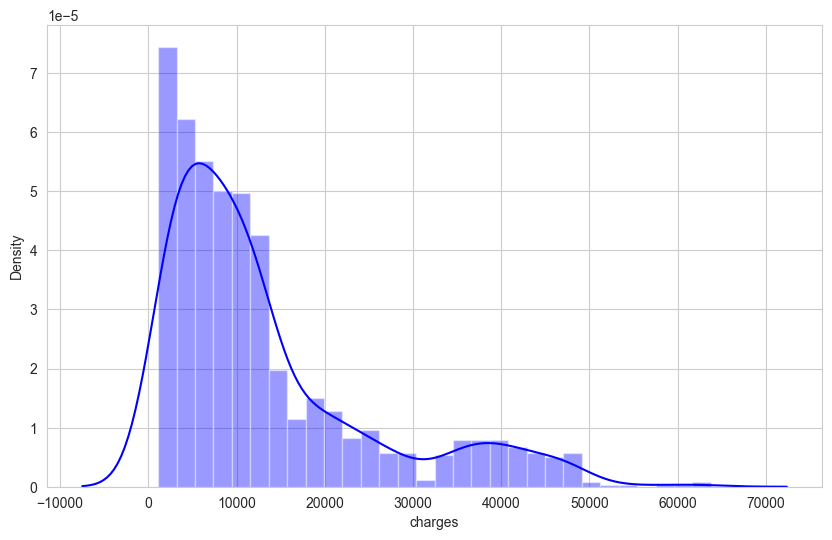

In [14]:
import warnings 
warnings.filterwarnings('ignore') 
sns.set_style('whitegrid') 
plt.figure(figsize=(10,6)) 
sns.distplot(insurance_data['charges'], color = 'b') 
plt.show()

<Axes: >

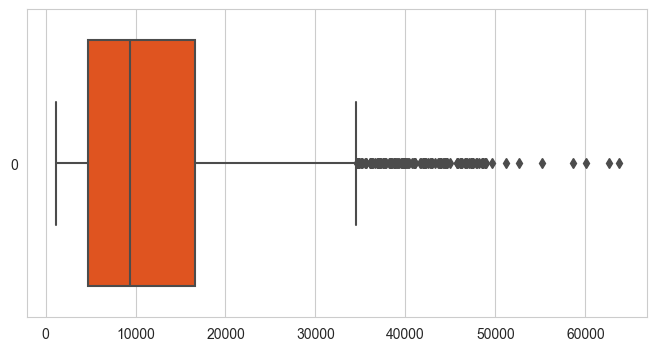

In [15]:
plt.figure(figsize=(8,4)) 
sns.boxplot(insurance_data['charges'], color = 'orangered', orient = 'h')

## Handling Outliers

In [16]:
from scipy.stats import zscore

In [17]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3]

,age,sex,bmi,children,smoker,region,charges
34,28,1,36.400,1,1,3,51194.55914
543,54,0,47.410,0,1,2,63770.42801
577,31,0,38.095,1,1,0,58571.07448
819,33,0,35.530,0,1,1,55135.40209
1146,60,1,32.800,0,1,3,52590.82939
1230,52,1,34.485,3,1,1,60021.39897
1300,45,1,30.360,0,1,2,62592.87309


In [18]:
insurance_data[np.abs(zscore(insurance_data['charges'])) > 3].index

Index([34, 543, 577, 819, 1146, 1230, 1300], dtype='int64')

In [19]:
insurance_data.drop([34, 543, 577, 819, 1146, 1230, 1300], inplace = True)

## Correlation

<Axes: >

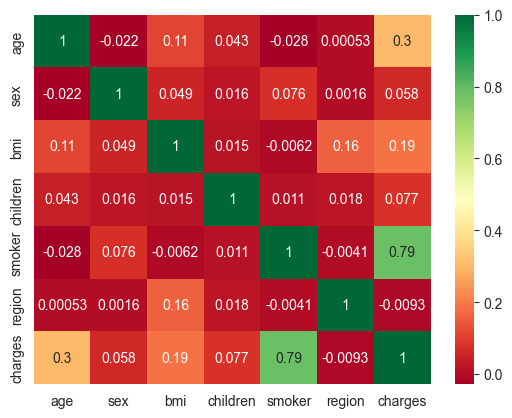

In [20]:
sns.heatmap(insurance_data.corr(), annot = True, cmap='RdYlGn')

## Split Data into Features & Target

In [21]:
X = insurance_data.drop('charges', axis = 1) 
Y = insurance_data['charges']

## Split into Train & Test samples

In [22]:
from sklearn.model_selection import train_test_split 
# splitting data into train & test i.e. 80% & 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

## ANN Regression

In [23]:
def build_model(): 
    model = Sequential() 
    # units = num of neurons, input_shape = number of features 
    model.add(Dense(units = 128, activation = 'relu', input_shape = [len(X.keys())])) 
    # Hidden Layer - I 
    model.add(Dense(units = 256, activation = 'relu')) 
    # Hidden Layer - II 
    model.add(Dense(units = 512, activation = 'relu')) 
    # Output Layer - For Regression 
    model.add(Dense(units = 1)) 
    # Optimizers (alpha) 
    optimizers = RMSprop(learning_rate = 0.001) 
    # Model Compilers 
    model.compile(loss = 'mean_squared_error',optimizer=optimizers, metrics=['mean_squared_error', 'mean_absolute_error']) 
    return model

In [24]:
model = build_model()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# epochs = num of iterations, batch_size = sample size per iteration, 
# validation_split = 20% (model test size), validation is done while training of model 
history = model.fit(x_train, y_train, epochs = 600, batch_size = 30, validation_split = 0.2)

Epoch 1/600


29/29 [==============================] - 3s 30ms/step - loss: 285435936.0000 - mean_squared_error: 285435936.0000 - mean_absolute_error: 12005.5557 - val_loss: 170082032.0000 - val_mean_squared_error: 170082032.0000 - val_mean_absolute_error: 8247.2969
Epoch 2/600
29/29 [==============================] - 0s 10ms/step - loss: 151542704.0000 - mean_squared_error: 151542704.0000 - mean_absolute_error: 8048.4272 - val_loss: 107319584.0000 - val_mean_squared_error: 107319584.0000 - val_mean_absolute_error: 9126.1064
Epoch 3/600
29/29 [==============================] - 0s 12ms/step - loss: 126698616.0000 - mean_squared_error: 126698616.0000 - mean_absolute_error: 9218.0742 - val_loss: 99922576.0000 - val_mean_squared_error: 99922576.0000 - val_mean_absolute_error: 8155.6660
Epoch 4/600
29/29 [==============================] - 0s 12ms/step - loss: 126423584.0000 - mean_squared_error: 126423584.0000 - mean_absolute_error: 8960.7236 - val_loss: 107842888.0000 - val_mean_squared_er